# Data Analysis with Python using Forbes 2022 Dataset

## Loading Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("datasets/forbes_2022_billionaires.csv")

In [4]:
df.head()

rank                personName   age  finalWorth  year  month  \
0     1                 Elon Musk  50.0    219000.0  2022      4   
1     2                Jeff Bezos  58.0    171000.0  2022      4   
2     3  Bernard Arnault & family  73.0    158000.0  2022      4   
3     4                Bill Gates  66.0    129000.0  2022      4   
4     5            Warren Buffett  91.0    118000.0  2022      4   

                category              source        country       state  ...  \
0             Automotive       Tesla, SpaceX  United States       Texas  ...   
1             Technology              Amazon  United States  Washington  ...   
2       Fashion & Retail                LVMH         France         NaN  ...   
3             Technology           Microsoft  United States  Washington  ...   
4  Finance & Investments  Berkshire Hathaway  United States    Nebraska  ...   

                       organization selfMade gender   birthDate  \
0                             Tesla     True      M  1971-06-28   
1                            Amazon     True      M  1964-01-12   
2  LVMH Moët Hennessy Louis Vuitton    False      M  1949-03-05   
3   Bill & Melinda Gates Foundation     True      M  1955-10-28   
4                Berkshire Hathaway     True      M  1930-08-30   

              title philanthropyScore                 residenceMsa  \
0               CEO               1.0                          NaN   
1      Entrepreneur               1.0  Seattle-Tacoma-Bellevue, WA   
2  Chairman and CEO               NaN                          NaN   
3         Cofounder               4.0  Seattle-Tacoma-Bellevue, WA   
4               CEO               5.0                    Omaha, NE   

   numberOfSiblings                                                bio  \
0               NaN  Elon Musk is working to revolutionize transpor...   
1               NaN  Jeff Bezos founded e-commerce giant Amazon in ...   
2               NaN  Bernard Arnault oversees the LVMH empire of so...   
3               NaN  Bill Gates turned his fortune from software fi...   
4               NaN  Known as the "Oracle of Omaha," Warren Buffett...   

                                               about  
0  Musk was accepted to a graduate program at Sta...  
1  Growing up, Jeff Bezos worked summers on his g...  
2  Arnault apparently wooed his wife, Helene Merc...  
3  When Gates was a kid, he spent so much time re...  
4  Buffett still lives in the same Omaha, Nebrask...  

[5 rows x 22 columns]

In [4]:
df.shape

(2668, 22)

In [5]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

## Data Preprocessing

In [7]:
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]

In [8]:
df.head()

rank                personName   age  finalWorth               category  \
0     1                 Elon Musk  50.0    219000.0             Automotive   
1     2                Jeff Bezos  58.0    171000.0             Technology   
2     3  Bernard Arnault & family  73.0    158000.0       Fashion & Retail   
3     4                Bill Gates  66.0    129000.0             Technology   
4     5            Warren Buffett  91.0    118000.0  Finance & Investments   

         country gender  
0  United States      M  
1  United States      M  
2         France      M  
3  United States      M  
4  United States      M

In [8]:
# df=df.rename(columns={"rank":"Sıra","personName":"İsim","age":"Yaş",
#                       "finalWorth":"Servet","category":"Kategori",
#                        "country":"Ülke", "gender":"Cinsiyet"})

In [9]:
df.head()

rank                personName   age  finalWorth               category  \
0     1                 Elon Musk  50.0    219000.0             Automotive   
1     2                Jeff Bezos  58.0    171000.0             Technology   
2     3  Bernard Arnault & family  73.0    158000.0       Fashion & Retail   
3     4                Bill Gates  66.0    129000.0             Technology   
4     5            Warren Buffett  91.0    118000.0  Finance & Investments   

         country gender  
0  United States      M  
1  United States      M  
2         France      M  
3  United States      M  
4  United States      M

In [10]:
df = df.set_index("rank")

In [11]:
df.head()

personName   age  finalWorth               category  \
rank                                                                      
1                    Elon Musk  50.0    219000.0             Automotive   
2                   Jeff Bezos  58.0    171000.0             Technology   
3     Bernard Arnault & family  73.0    158000.0       Fashion & Retail   
4                   Bill Gates  66.0    129000.0             Technology   
5               Warren Buffett  91.0    118000.0  Finance & Investments   

            country gender  
rank                        
1     United States      M  
2     United States      M  
3            France      M  
4     United States      M  
5     United States      M

In [12]:
df.dtypes

personName     object
age           float64
finalWorth    float64
category       object
country        object
gender         object
dtype: object

In [13]:
df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(2568, 6)

## Informations about gender of the richest in the world

In [14]:
df["gender"].value_counts()

M    2341
F     311
Name: gender, dtype: int64

In [5]:
df["gender"].value_counts(normalize=True)

M    0.88273
F    0.11727
Name: gender, dtype: float64

In [6]:
df[df["country"]=="Turkey"].gender.value_counts(normalize=True)

M    0.826087
F    0.173913
Name: gender, dtype: float64

In [18]:
df["country"].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', nan, 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Ireland', 'Bermuda',
       'Lebanon', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Ando

In [20]:
df[df["country"]=="Canada"].gender.value_counts(normalize=True)

M    0.952381
F    0.047619
Name: Cinsiyet, dtype: float64

In [21]:
df_gender = df.groupby(["gender"])

In [22]:
df_gender["age"].mean()

Cinsiyet
F    62.937063
M    64.409290
Name: Yaş, dtype: float64

## Who are the top 10 richest in the world?

<Axes: xlabel='finalWorth', ylabel='personName'>

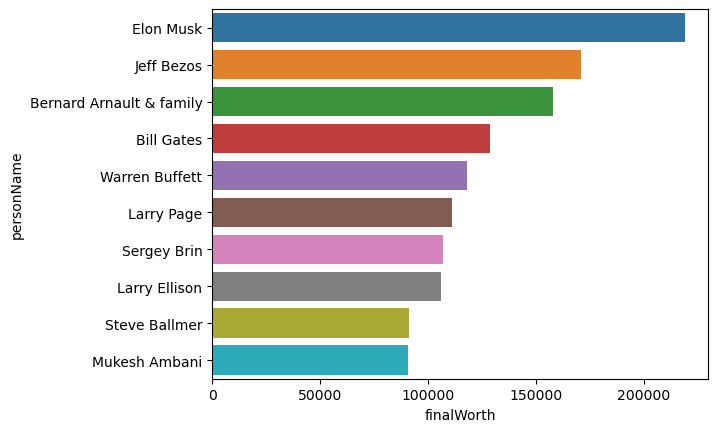

In [8]:
import seaborn as sns
sns.barplot(y = df["personName"][:10], x = df["finalWorth"][:10])

## Which country has the highest number of billionaires?

In [27]:
len(df["country"].unique())

73

In [28]:
df_country = df.groupby("country")

In [29]:
df_country_number = pd.DataFrame(df_ulke.size().sort_values(ascending=False), 
                           columns = ["number"])

In [30]:
df_country_number.head()

Sayı
Ülke                
United States    742
China            546
India            154
Germany           94
United Kingdom    81

<AxesSubplot:xlabel='Sayı', ylabel='Ülke'>

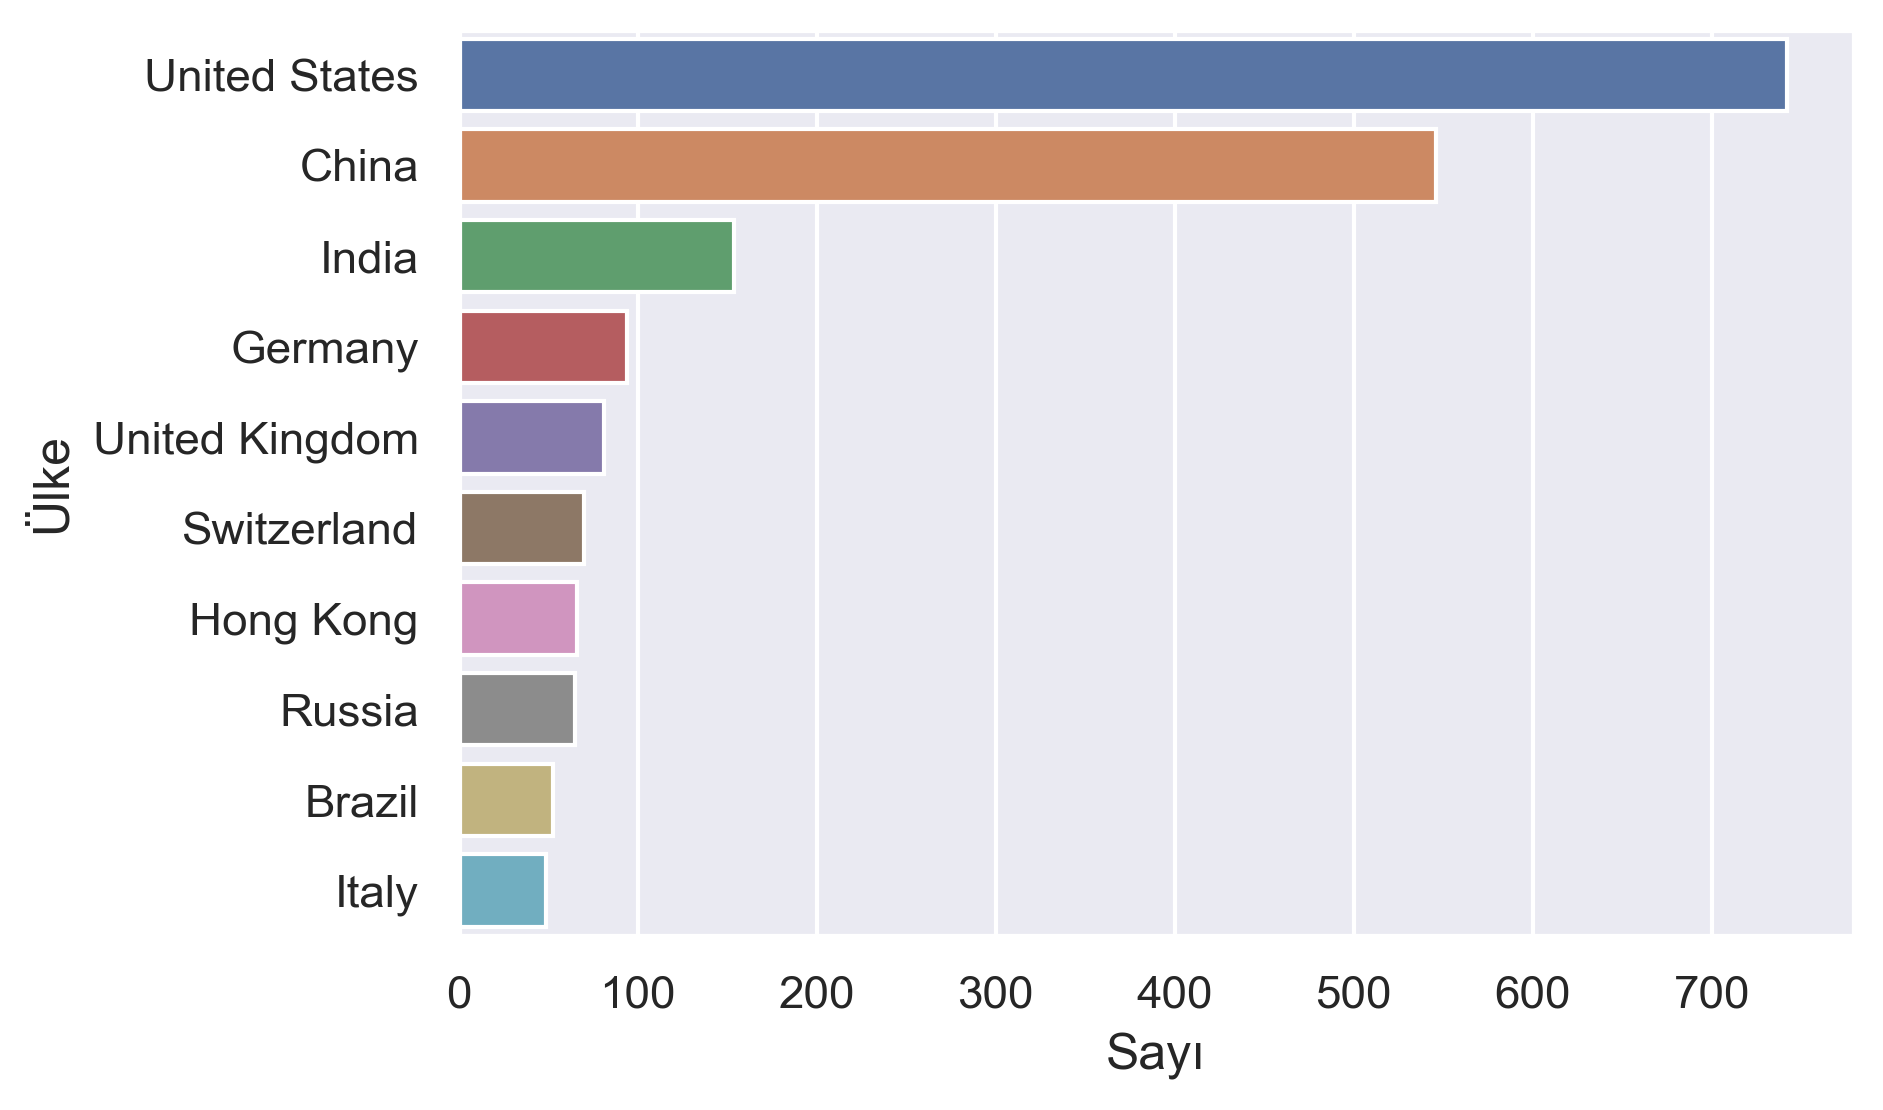

In [32]:
sns.barplot(x = df_country_number["number"][:10] , y = df_country_number.index[:10])

## Who are the Top 10 richest in the Turkey?

In [35]:
df_turkey = df[df["country"]=="Turkey"]

In [36]:
df_turkey["personName"].count()

23

In [37]:
df_turkey.head(10)

İsim   Yaş  Servet                    Kategori    Ülke  \
Sıra                                                                          
601           Murat Ulker  63.0  4700.0             Food & Beverage  Turkey   
1292    Ferit Faik Sahenk  58.0  2400.0                 Diversified  Turkey   
1341         Erman Ilicak  54.0  2300.0  Construction & Engineering  Turkey   
1397         Filiz Sahenk  55.0  2200.0                 Diversified  Turkey   
1579       Sezai Bacaksiz  72.0  1900.0                 Diversified  Turkey   
1579        Nihat Ozdemir  72.0  1900.0                 Diversified  Turkey   
1645    Ibrahim Erdemoglu  59.0  1800.0               Manufacturing  Turkey   
1818  Semahat Sevim Arsel  93.0  1600.0                 Diversified  Turkey   
1929  Hamdi Akin & family  67.0  1500.0                 Diversified  Turkey   
1929          Ahmet Calik  64.0  1500.0                 Diversified  Turkey   

     Cinsiyet  
Sıra           
601         M  
1292        M  
1341        M  
1397        F  
1579        M  
1579        M  
1645        M  
1818        F  
1929        M  
1929        M

<AxesSubplot:xlabel='Servet', ylabel='İsim'>

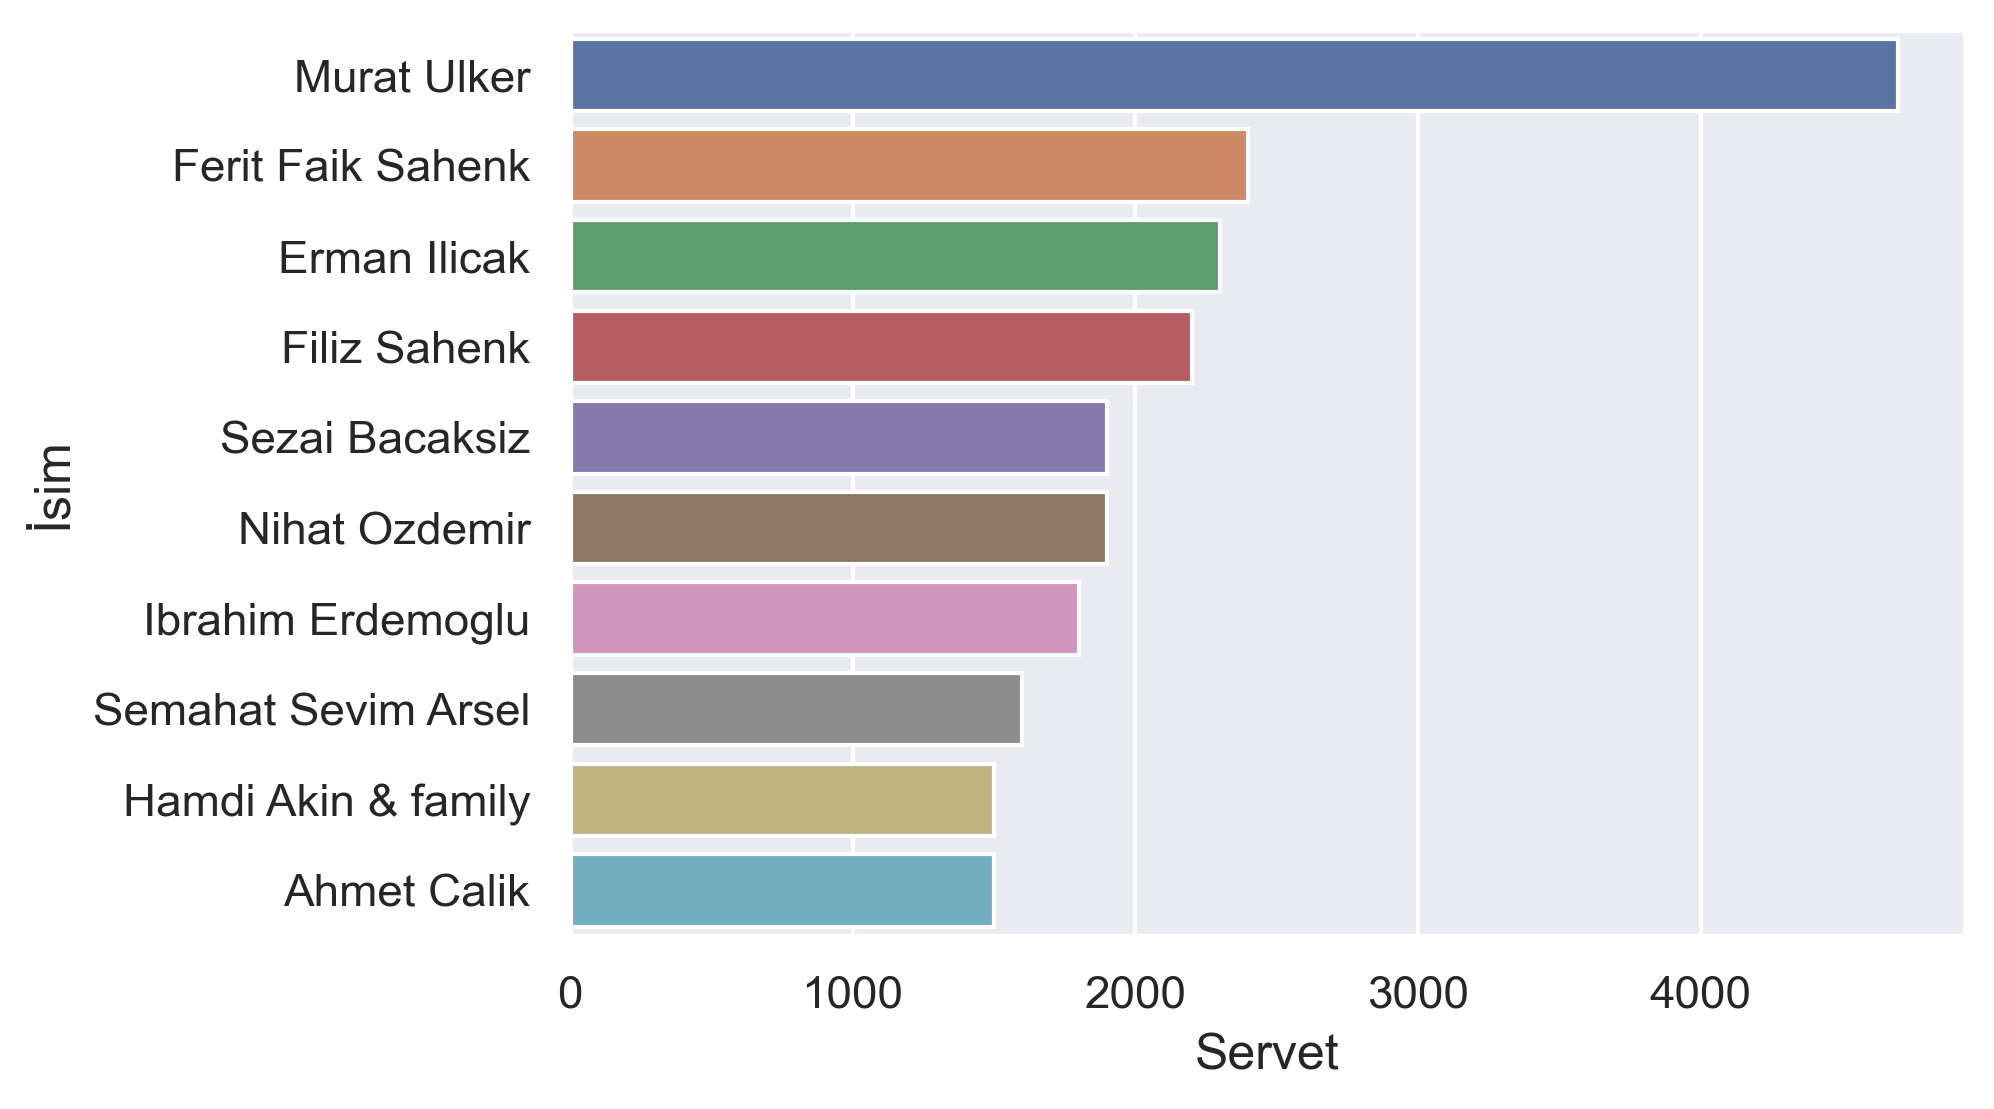

In [38]:
sns.barplot(y=df_turkey["personName"][:10], x = df_turkey["finalWorth"][:10])

## Which Industry has the most billionaires in it?

In [39]:
df["category"].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [40]:
df["category"]=df["category"].apply(lambda x:x.replace(" ","")).\
    apply(lambda x:x.replace("&","_"))

In [41]:
df["category"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [42]:
df_category = df.groupby("category").size()

In [43]:
df_category.head()

Kategori
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [44]:
df_category = df_category.to_frame()

In [45]:
df_category.head()

0
Kategori                     
Automotive                 66
Construction_Engineering   45
Diversified               174
Energy                     93
Fashion_Retail            238

In [46]:
df_category = df_category.rename(columns={0:"count"}).sort_values(by="count",
                                                                ascending=False)

In [47]:
df_category.head()

Sayi
Kategori                 
Finance_Investments   381
Technology            332
Manufacturing         319
Fashion_Retail        238
Healthcare            209

<AxesSubplot:xlabel='Sayi', ylabel='Kategori'>

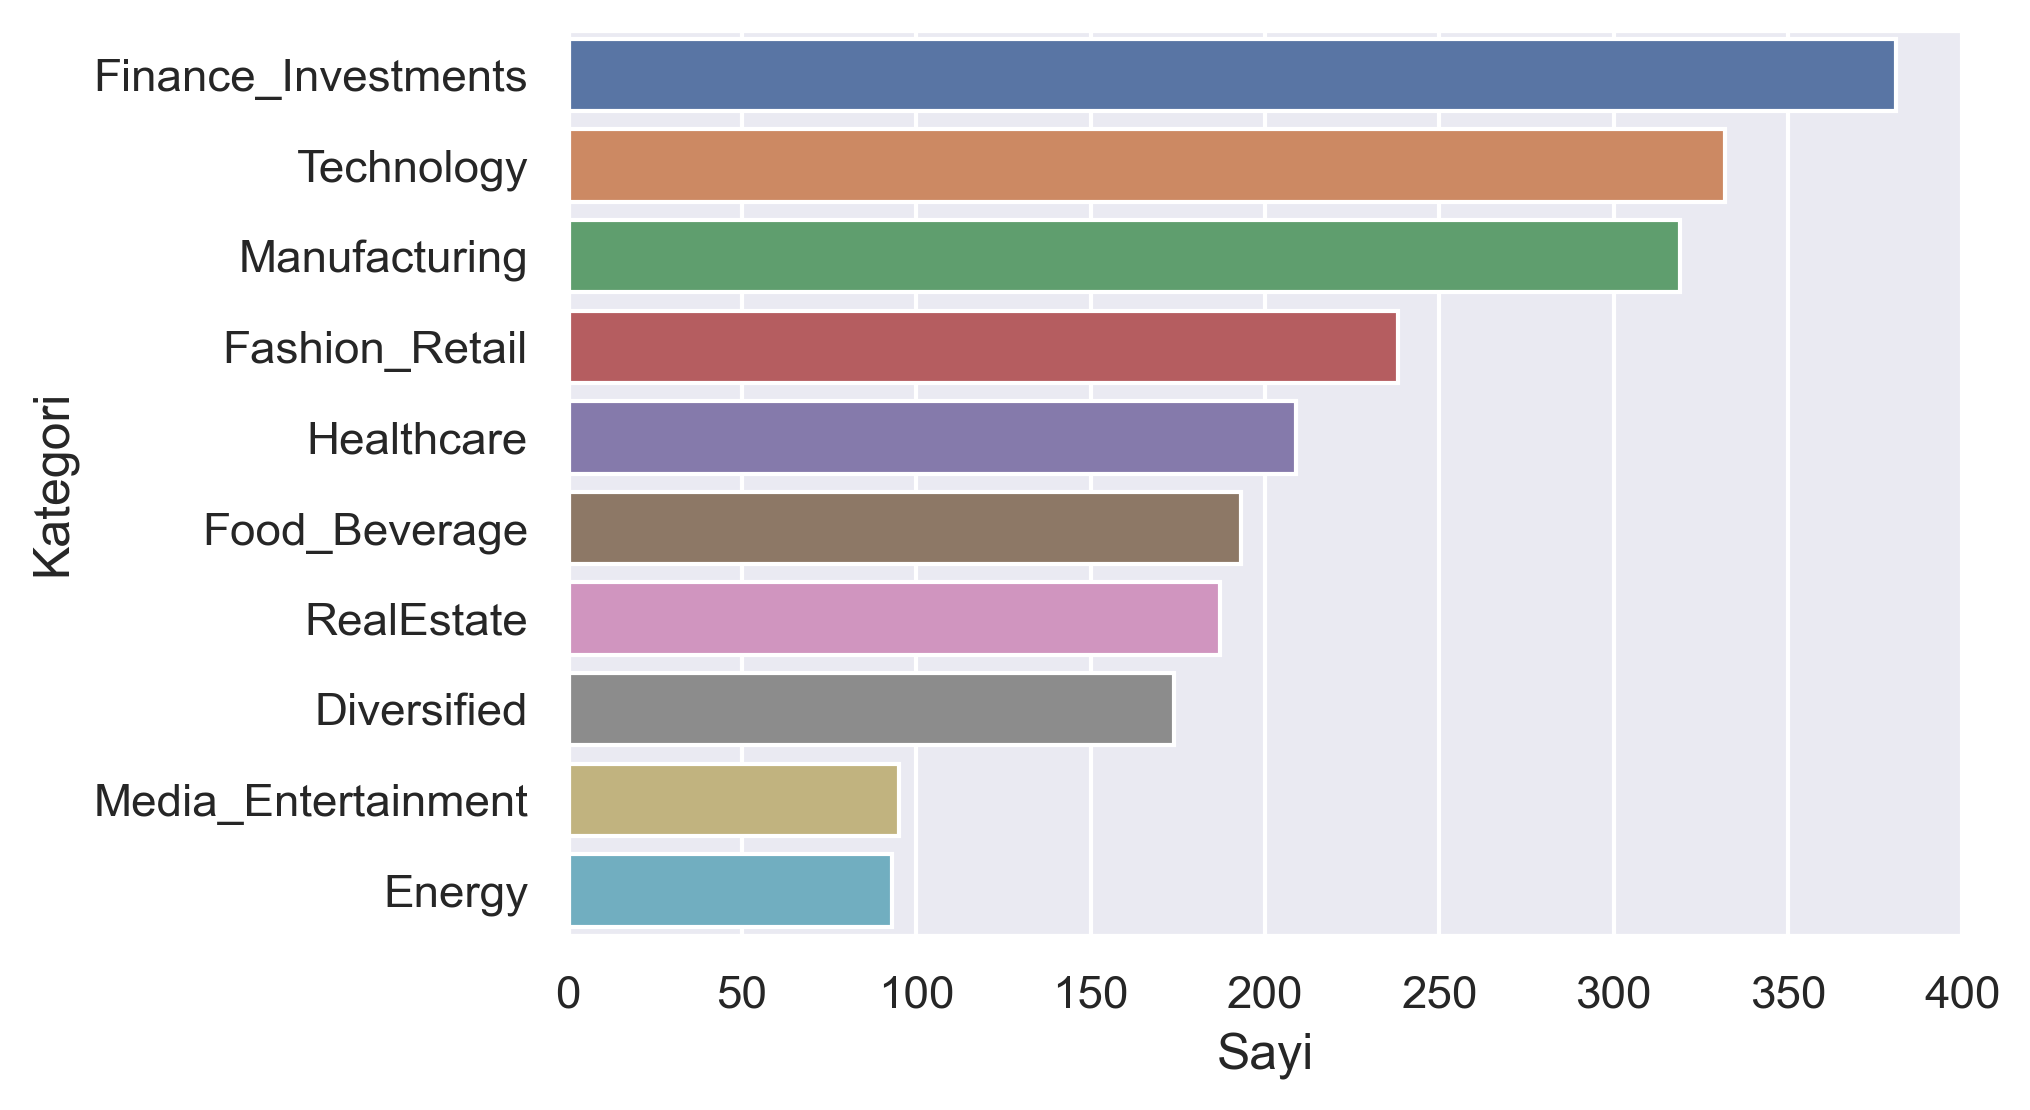

In [48]:
sns.barplot( x = df_category["count"][:10], y = df_category.index[:10])

## The distribution of age

<AxesSubplot:xlabel='Yaş', ylabel='Count'>

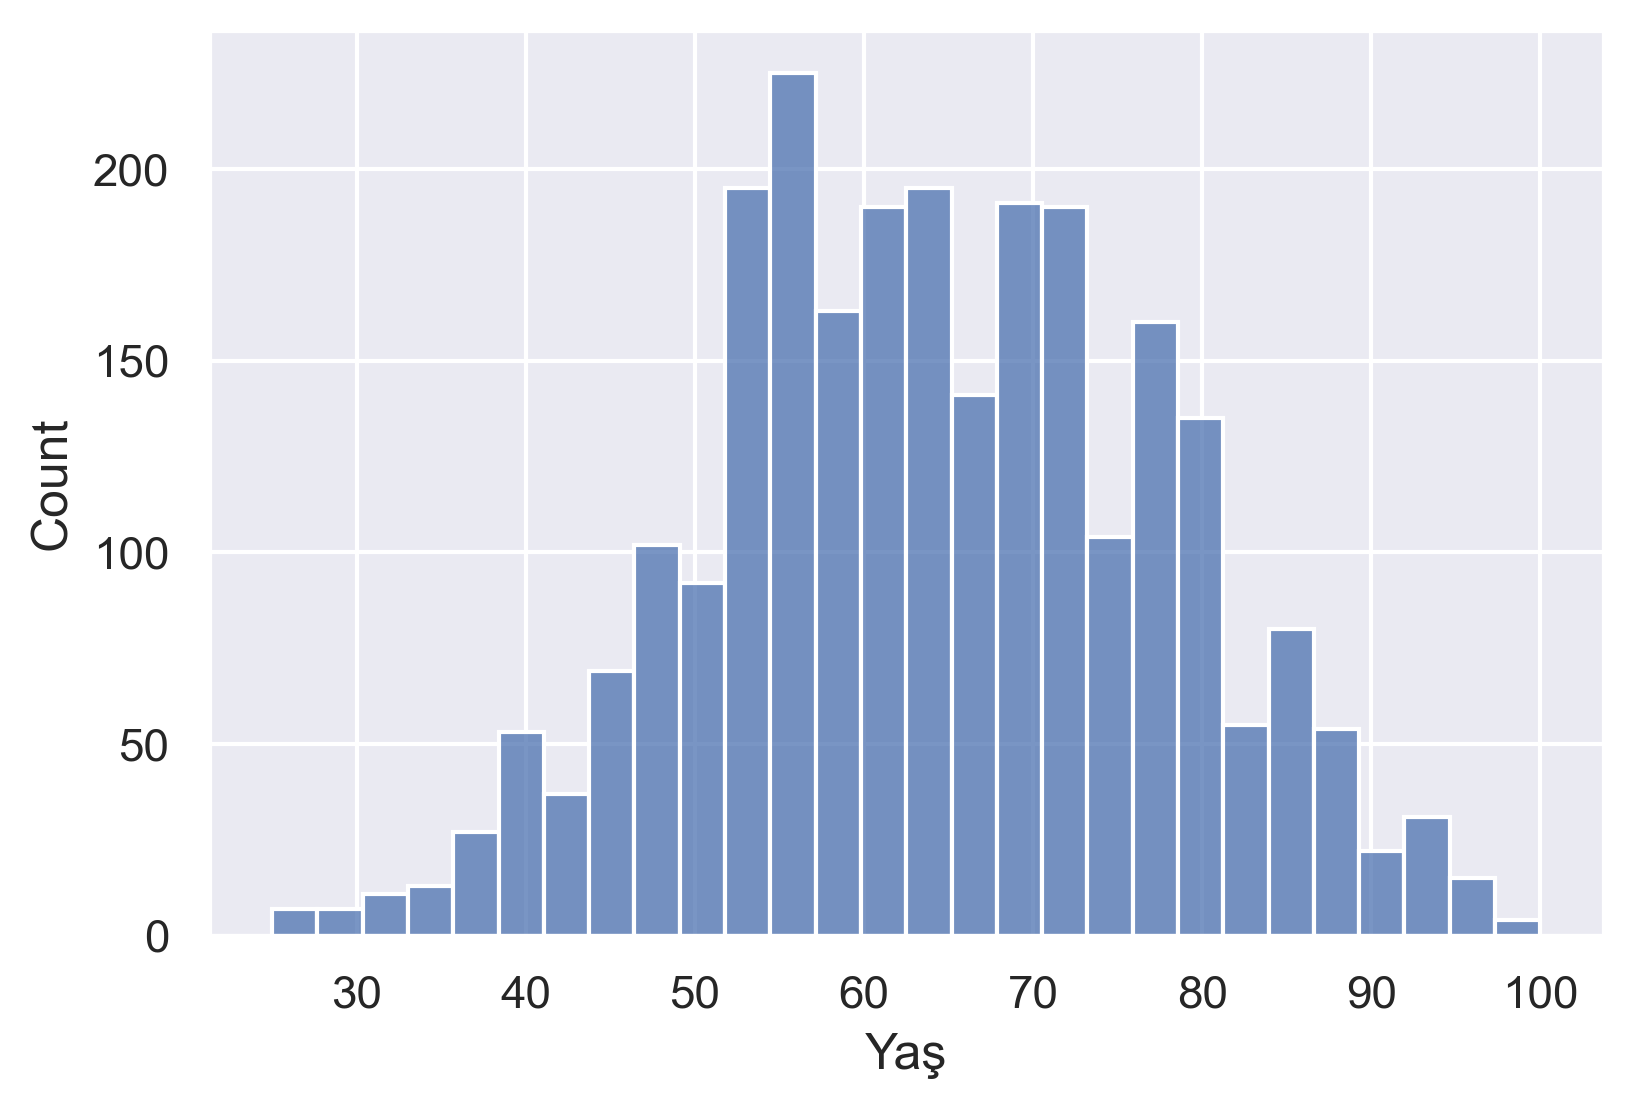

In [50]:
sns.histplot(df["age"])

## The youngest billionaires

In [51]:
df_age = df.sort_values(by="age")
df_age

İsim    Yaş   Servet             Kategori  \
Sıra                                                                     
2190           Alexandra Andresen   25.0   1300.0          Diversified   
1929                  Wang Zelong   25.0   1500.0        Metals_Mining   
1929             Pedro Franceschi   25.0   1500.0  Finance_Investments   
1929            Henrique Dubugras   26.0   1500.0  Finance_Investments   
2190           Katharina Andresen   26.0   1300.0          Diversified   
...                           ...    ...      ...                  ...   
1929  Ana Maria Brescia Cafferata   97.0   1500.0          Diversified   
163                   Robert Kuok   98.0  11700.0          Diversified   
1341                David Murdock   98.0   2300.0        Food_Beverage   
1238               Charles Munger   98.0   2500.0  Finance_Investments   
1645                George Joseph  100.0   1800.0  Finance_Investments   

               Ülke Cinsiyet  
Sıra                          
2190         Norway        F  
1929          China        M  
1929  United States        M  
1929  United States        M  
2190         Norway        F  
...             ...      ...  
1929           Peru        F  
163       Hong Kong        M  
1341  United States        M  
1238  United States        M  
1645  United States        M  

[2568 rows x 6 columns]

<AxesSubplot:xlabel='Yaş', ylabel='İsim'>

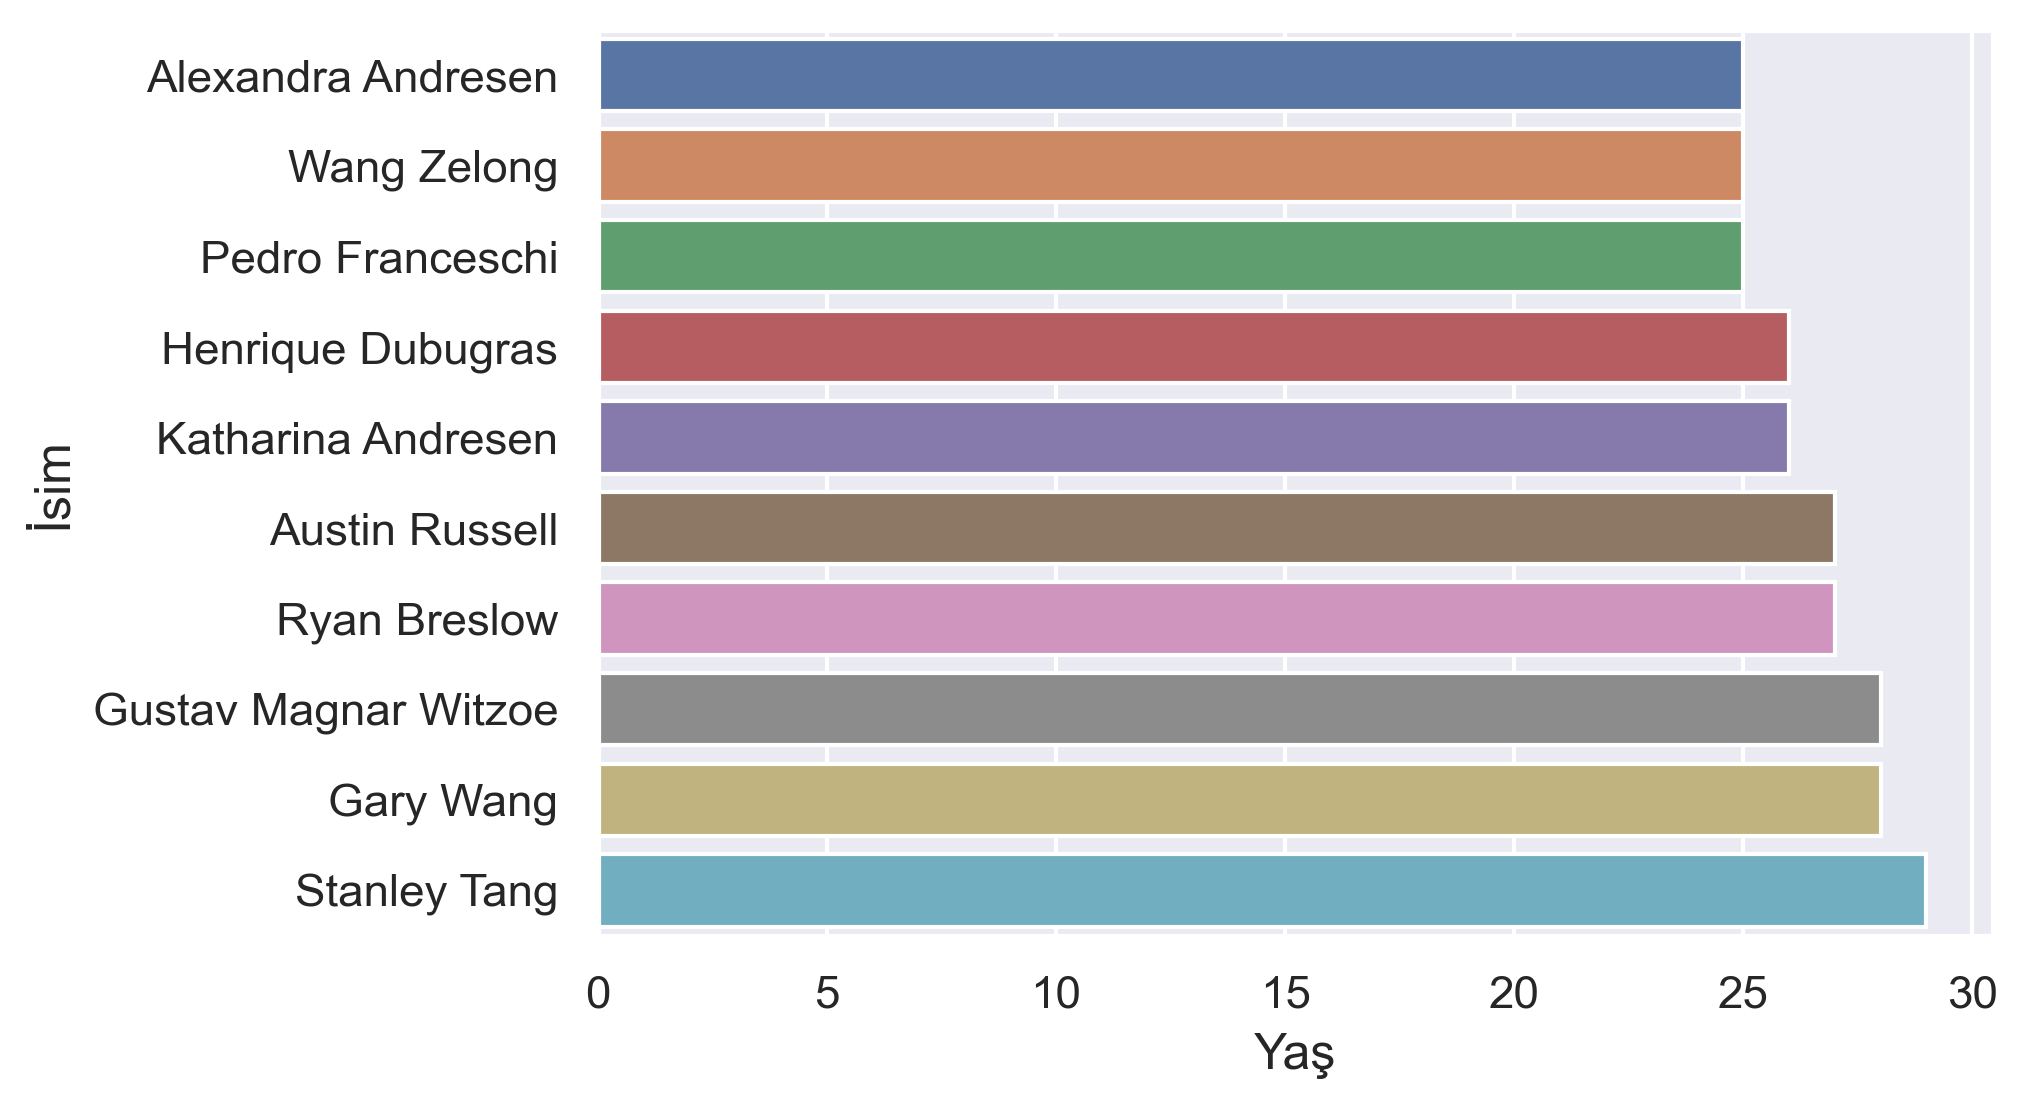

In [52]:
sns.barplot(y=df_age["personName"][:10], x = df_age["age"][:10])